## Project 2 - EDA on Vehicle Insurance Customer Data

A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer. 

The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DF1=pd.read_csv(r"C:\Users\Home\Documents\customer_details.csv")
DF1

,0,1,2,3,4,5,6,7
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


## 1. Add the column names to both datasets:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
DF1=pd.read_csv(r"C:\Users\Home\Documents\customer_details.csv")
#Headers are arrays
headers=['Customer_ID','Gender','Age','Driving_Licence_Present','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage']
DF1.columns=headers
DF1.head(10)


,Customer_ID,Gender,Age,Driving_Licence_Present,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
5,6.0,Female,24.0,1.0,33.0,0.0,< 1 Year,Yes
6,7.0,Male,23.0,1.0,11.0,0.0,< 1 Year,Yes
7,8.0,Female,56.0,1.0,28.0,0.0,1-2 Year,Yes
8,9.0,Female,24.0,1.0,3.0,1.0,< 1 Year,No
9,10.0,Female,32.0,1.0,6.0,1.0,< 1 Year,No


In [9]:
#---------------------------------CUSTOMER POLICY DETAILS----------------------------
DF2=pd.read_csv(r"c:\users\home\documents\customer_policy_details.csv")
headers1=['Customer_ID','Annual_Premium_(in Rs)','Sales_Channel_code','Vintage','Response']
DF2.columns=headers1
DF2.head()

,Customer_ID,Annual_Premium_(in Rs),Sales_Channel_code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


## 2. Checking and Cleaning Data Quality:
i. Null values

Generate a summary of count of all the null values column wise
Drop Null values for customer_id because central tendencies for id’s is not feasible.
Replace all null values for numeric columns by mean. 
Replace all null values for Categorical value by mode.
ii. Outliers

Generate a summary of count of all the outliers column wise
Replace all outlier values for numeric columns by mean. 
(Hint1: for outlier treatment use IQR method as follows:

For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
'''  CHECKING NULL VALUES AND COUNTS OF NULL VALUES FOR CUSTOMER DETAILS'''
# Generating Count of Null Values for Customer_details
#DF1_null contains True and False in Columns as isnull returns True or False
DF1_null=DF1.isnull()
DF1_null
print('n True=Null values in customer_details')
print('-'*120)
b=DF1_null.columns.values.tolist()
print(b)
print('-'*120)
''' PRINTING USING DATAFRAME'''
for col in DF1:
    sum1=sum(pd.isnull(DF1[col]))
    print(sum1,end='\t\t') 
print('-'*120)
#print(DF1_null.value_counts())
for i in DF1_null.columns.values.tolist():
    print(DF1_null[i].value_counts())


print(b)
print('-'*120)
''' PRINTING USING NUMPY ARRAY'''
boolarr=np.array([DF1_null], dtype=bool)

boolsum=boolarr.sum(axis=1)  #the array is two dimensional hence in output 

print('\n'.join(['\t\t'.join(['{:3}'.format(item) for item in row]) 
      for row in boolsum]))
#out_arr = np.char.split(str(boolsum), sep =' ')
#print(out_arr)
print('-'*120)
df2=DF1.isnull().sum()
df2

n True=Null values in customer_details
------------------------------------------------------------------------------------------------------------------------
['Customer_ID', 'Gender', 'Age', 'Driving_Licence_Present', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
------------------------------------------------------------------------------------------------------------------------
386		368		368		393		392		381		381		407		------------------------------------------------------------------------------------------------------------------------
False    380723
True        386
Name: Customer_ID, dtype: int64
False    380741
True        368
Name: Gender, dtype: int64
False    380741
True        368
Name: Age, dtype: int64
False    380716
True        393
Name: Driving_Licence_Present, dtype: int64
False    380717
True        392
Name: Region_Code, dtype: int64
False    380728
True        381
Name: Previously_Insured, dtype: int64
False    380728
True        381
Name: 

Customer_ID                386
Gender                     368
Age                        368
Driving_Licence_Present    393
Region_Code                392
Previously_Insured         381
Vehicle_Age                381
Vehicle_Damage             407
dtype: int64

In [5]:
import numpy as np
import pandas as pd
from io import StringIO
'''  DROP NULL VALUES FOR CUSTOMER_ID
     REPLACING NULL VALUES FOR NUMERIC BY MEAN
     REPLACING NULL VALUES FOR Categorical value by mode'''
print("Null Values in Customer_ID before dropping",DF1['Customer_ID'].isnull().sum())
DF1.dropna(subset=['Customer_ID'], inplace=True)
print("Dropped all Null Values")
print("Confirmation If Null Values Present in Customer_ID Column",DF1['Customer_ID'].isnull().sum())
#----------------------------------Gender-------------------------------------------------
print("Null Values in Gender before values are replaced",DF1['Gender'].isnull().sum())
DF1['Gender']=DF1['Gender'].fillna(DF1['Gender'].mode()[0])
print("Checking NULL values after replacing with mode",DF1['Gender'].isnull().sum())
#------------AGE-----------------
print('Number of NULL Values in Age Column',DF1['Age'].isnull().sum())
DF1['Age']=DF1['Age'].fillna(DF1['Age'].mean())
print('NULL Values in Age Column after replacing it with mean',DF1['Age'].isnull().sum())
#-----------------REGION CODE------------------------
print('Number of NULL Values in Region_Code' ,DF1['Region_Code'].isna().sum())
DF1['Region_Code']=DF1['Region_Code'].fillna(DF1['Region_Code'].mode()[0])
print('Filled NULL Values in Region_Code with mode Values')
print('NULL values after Region_Code is replaced ',DF1['Region_Code'].isna().sum())
#-----------------PREVIOUSLY INSURED------------------------
print("Null values in 'Previously_Insured' : ",DF1["Previously_Insured"].isnull().sum())
print('Filled NULL in Previously_Insured with mean values')
DF1["Previously_Insured"]=DF1["Previously_Insured"].fillna(DF1["Previously_Insured"].mode()[0])
print("Null value in 'Previously_Insured' after replacing : ",DF1["Previously_Insured"].isnull().sum())
#-----------------Vehicle Age-------------------------------
print("Null Values in Column 'Vehicle Age': ",DF1['Vehicle_Age'].isnull().sum())
print('Replacing NULL values with Mode')
DF1['Vehicle_Age']=DF1['Vehicle_Age'].fillna(DF1['Vehicle_Age'].mode()[0])
print('NULL Values after Vehicle_Age is replaced', DF1['Vehicle_Age'].isnull().sum())
#-----------------Vehicle Damage-------------------------------
print("Null Values in Column 'Vehicle_Damage': ",DF1['Vehicle_Damage'].isnull().sum())
print('Replacing NULL values with Mode')
DF1['Vehicle_Damage']=DF1['Vehicle_Damage'].fillna(DF1['Vehicle_Damage'].mode()[0])
print('NULL Values after Vehicle_Damage is replaced', DF1['Vehicle_Damage'].isnull().sum())
DF1.head()

Null Values in Customer_ID before dropping 386
Dropped all Null Values
Confirmation If Null Values Present in Customer_ID Column 0
Null Values in Gender before values are replaced 368
Checking NULL values after replacing with mode 0
Number of NULL Values in Age Column 366
NULL Values in Age Column after replacing it with mean 0
Number of NULL Values in Region_Code 391
Filled NULL Values in Region_Code with mode Values
NULL values after Region_Code is replaced  0
Null values in 'Previously_Insured' :  381
Filled NULL in Previously_Insured with mean values
Null value in 'Previously_Insured' after replacing :  0
Null Values in Column 'Vehicle Age':  381
Replacing NULL values with Mode
NULL Values after Vehicle_Age is replaced 0
Null Values in Column 'Vehicle_Damage':  406
Replacing NULL values with Mode
NULL Values after Vehicle_Damage is replaced 0


,Customer_ID,Gender,Age,Driving_Licence_Present,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [6]:
import numpy as np
import pandas as pd
from io import StringIO
'''  CHECKING NULL VALUES AND COUNTS OF NULL VALUES FOR CUSTOMER POLICY DETAILS'''
# Generating Count of Null Values for Customer_details
#DF2_null contains True and False in Columns as isnull returns True or False
DF2_null=DF2.isnull()
print('n True=Null values in customer policy details')
print('-'*120)
b=DF2_null.columns.values.tolist()
print(b)
print('-'*120)

''' PRINTING USING DATAFRAME'''
DF2_null['Sum'] = DF2_null[DF2_null.columns.values.tolist()].sum()
for col in DF2:
    sum1=sum(pd.isnull(DF2[col]))
    print(sum1,end='\t\t') 
print('-'*120)
#print(DF1_null.value_counts())
print(b)
print('-'*120)
''' PRINTING USING NUMPY ARRAY'''
boolarr=np.array([DF2_null], dtype=bool)
c=np.count_nonzero(boolarr)
boolsum=boolarr.sum(axis=1)  #the array is two dimensional hence in output
print(boolsum)
print('\n'.join(['\t\t'.join(['{:3}'.format(item) for item in row]) 
      for row in boolsum]))

print('-'*120)

n True=Null values in customer policy details
------------------------------------------------------------------------------------------------------------------------
['Customer_ID', 'Annual_Premium_(in Rs)', 'Sales_Channel_code', 'Vintage', 'Response']
------------------------------------------------------------------------------------------------------------------------
387		346		400		388		361		------------------------------------------------------------------------------------------------------------------------
['Customer_ID', 'Annual_Premium_(in Rs)', 'Sales_Channel_code', 'Vintage', 'Response']
------------------------------------------------------------------------------------------------------------------------
[[   387    346    400    388    361 381109]]
387		346		400		388		361		381109
------------------------------------------------------------------------------------------------------------------------


In [7]:
import numpy as np
import pandas as pd
from io import StringIO
'''  DROP NULL VALUES FOR CUSTOMER_ID
     REPLACING NULL VALUES FOR NUMERIC BY MEAN
     REPLACING NULL VALUES FOR Categorical value by mode'''
print("BEFORE dELETING Confirmation If Null Values Present in Customer_ID Column",DF2['Customer_ID'].isnull().sum())
print("Dropped all Null Values from Customer ID column")
DF2.dropna(subset='Customer_ID', inplace=True)
print("Confirmation If Null Values Present in Customer_ID Column",DF2['Customer_ID'].isnull().sum())
#----------------------------REPLACING NULL VALUES FOR NUMERIC BY MEAN--------------------------
#------------Annual Premium Replace by mean-----------------
print('Annual Premium before NULL Values were replaced',DF2['Annual_Premium_(in Rs)'].isna().sum())
DF2['Annual_Premium_(in Rs)']=DF2['Annual_Premium_(in Rs)'].fillna(DF2['Annual_Premium_(in Rs)'].mean())
print('Annual Premium after NULL Values are replaced',DF2['Annual_Premium_(in Rs)'].isnull().sum())
#------------Sales Channel Code  Mode-----------------
print('Sales Channel Code before NULL Values were replaced',DF2['Sales_Channel_code'].isnull().sum())
DF2['Sales_Channel_code']=DF2['Sales_Channel_code'].fillna(DF2['Sales_Channel_code'].mode()[0])
print('Sales_Channel_code after NULL Values are replaced',DF2['Sales_Channel_code'].isnull().sum())
#------------Vintage mean-----------------
print('Vintage column before NULL Values were replaced',DF2['Vintage'].isna().sum())
DF2['Vintage']=DF2['Vintage'].fillna(DF2['Vintage'].mean())
print('Vintage after NULL Values are replaced',DF2['Vintage'].isnull().sum())
#------------Response mode-----------------
print('Response column before NULL Values were replaced',DF2['Response'].isna().sum())
DF2['Response']=DF2['Response'].fillna(DF2['Response'].mode()[0])
print('Response after NULL Values are replaced',DF2['Response'].isnull().sum())

DF1.head()

BEFORE dELETING Confirmation If Null Values Present in Customer_ID Column 387
Dropped all Null Values from Customer ID column
Confirmation If Null Values Present in Customer_ID Column 0
Annual Premium before NULL Values were replaced 344
Annual Premium after NULL Values are replaced 0
Sales Channel Code before NULL Values were replaced 400
Sales_Channel_code after NULL Values are replaced 0
Vintage column before NULL Values were replaced 388
Vintage after NULL Values are replaced 0
Response column before NULL Values were replaced 361
Response after NULL Values are replaced 0


,Customer_ID,Gender,Age,Driving_Licence_Present,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


# ---------------outliers------------------
## Generate a summary of count of all the outliers column wise Replace all outlier values for numeric columns by mean. (Hint1: for outlier treatment use IQR method as follows:

### For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

In [8]:
#-------------------SUMMARY OF CUSTOMER DETAILS AND CUSTOMER POLICY DETAILS---------------------------
import pandas as pd
print('Customer Details', DF1.describe())
print('Customer Policy Details',DF2.describe())


Customer Details          Customer_ID            Age  Driving_Licence_Present    Region_Code  \
count  380723.000000  380723.000000            380331.000000  380723.000000   
mean   190548.776244      38.822788                 0.997868      26.391090   
std    110016.805160      15.504826                 0.046128      13.223772   
min         1.000000      20.000000                 0.000000       0.000000   
25%     95269.500000      25.000000                 1.000000      15.000000   
50%    190543.000000      36.000000                 1.000000      28.000000   
75%    285822.500000      49.000000                 1.000000      35.000000   
max    381109.000000      85.000000                 1.000000      52.000000   

       Previously_Insured  
count       380723.000000  
mean             0.457800  
std              0.498217  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000  
Customer Policy Det

In [9]:
#----------------OUTLIERS for AGE in Customer Details================
import numpy as np
Q1=DF1.describe().loc['25%','Age']
Q3=DF1.describe().loc['75%','Age']
IQR=Q3-Q1
print('Q1: ',Q1)
print('Count of ages in ', Q1,' ',DF1.loc[DF1['Age']==Q1,'Age'].count())
print('Total count of people ',DF1.count())
Agearr=DF1['Age'].unique().tolist()
Agearr.sort()
Agecount=[]
for i in Agearr:
    Agecount.append(DF1.loc[DF1['Age']==i,'Age'].count())

print('Array of ages ',Agearr)
print('Mapped count',Agecount)
Agepercent=[]
print('Age count',DF1.Age.count())
Agepercent=list(map(lambda x, y: y*100/DF1.Age.count(), Agearr, Agecount))
Output =list(map(lambda n: "%.2f" % n, Agepercent))
print('Age Percent',Output)
print('Q3: ',Q3)
print('IQR: ',IQR)
print('OUTLIERS PRESENT IN AGE <',(Q1-IQR*1.5),' ', DF1.loc[DF1['Age']<(Q1-IQR*1.5),'Age'].count())
print('OUTLIERS PRESENT IN AGE >',(Q3+IQR*1.5),' ', DF1.loc[DF1['Age']>(Q3+IQR*1.5),'Age'].count())

#----------------OUTLIERS for Region in Customer  Details================
Q1=DF1.describe().loc['25%','Region_Code']
Q3=DF1.describe().loc['75%','Region_Code']
Qcount=DF1.loc[DF1['Region_Code']==28.0,'Region_Code'].count()
Qcount1=DF1.loc[DF1['Region_Code']==0.0,'Region_Code'].count()
print('Distinct Region_Codes ',DF1.Region_Code.unique())
c=DF1.groupby(['Region_Code']).nunique().reset_index()
#print(c)    
print('Minimum Count of Region_Codes ',DF1.Region_Code.min())
print('Count of Region_Codes with 28.0 =',Qcount)
print('Count of Region_Codes with 0.0 =',Qcount1)
IQR=Q3-Q1
print('Q1: ',Q1)
print('Q3: ',Q3)
print('OUTLIERS PRESENT IN Region_Code', DF1.loc[DF1['Region_Code']<(Q1-IQR*1.5),'Region_Code'].count())
print('OUTLIERS PRESENT IN Region_Code', DF1.loc[DF1['Region_Code']>(Q3+IQR*1.5),'Region_Code'].count())



Q1:  25.0
Count of ages in  25.0   20596
Total count of people  Customer_ID                380723
Gender                     380723
Age                        380723
Driving_Licence_Present    380331
Region_Code                380723
Previously_Insured         380723
Vehicle_Age                380723
Vehicle_Damage             380723
dtype: int64
Array of ages  [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 38.82278753907513, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0]
Mapped count [6221, 16426, 20919, 24217, 25908, 20596, 13516, 10740, 8954, 7410, 6244, 5500, 4986, 5002, 4882, 4925, 5058, 5392, 5703, 366, 6444, 7154, 7726, 7987, 8408, 8333, 8169, 7859, 7336, 7104, 6604, 6252, 5904, 55

In [10]:
import numpy as np
import pandas as pd
#----------------OUTLIERS for Customer Policy Details================
#----------------OUTLIERS for Annual_Premium_(in Rs) in Customer policy Details================
Q1=DF2.describe().loc['25%','Annual_Premium_(in Rs)']
Q3=DF2.describe().loc['75%','Annual_Premium_(in Rs)']
IQR=Q3-Q1
print('Q1: ',Q1)
print('Q3: ',Q3)
print('OUTLIERS PRESENT IN Annual_Premium_(in Rs)', DF2.loc[DF2['Annual_Premium_(in Rs)']<(Q1-IQR*1.5),'Annual_Premium_(in Rs)'].count())
print('OUTLIERS PRESENT IN Annual_Premium_(in Rs)', DF2.loc[DF2['Annual_Premium_(in Rs)']>(Q3+IQR*1.5),'Annual_Premium_(in Rs)'].count())

#----------------OUTLIERS for Vintage in Customer Policy Details================
Q1=DF2.describe().loc['25%','Vintage']
Q3=DF2.describe().loc['75%','Vintage']
IQR=Q3-Q1
print('Q1: ',Q1)
print('Q3: ',Q3)
print('Outliers in Vintage', DF2.loc[DF2['Vintage']<(Q1-IQR*1.5),'Vintage'].count())
print('Outliers Vintage', DF2.loc[DF2['Vintage']>(Q3+IQR*1.5),'Vintage'].count())

#----------------REPLACING OUTLIERS Annual_Premium_(in Rs) in Customer Policy Details WITH MEDIAN VALUES================
Q1=DF2.describe().loc['25%','Annual_Premium_(in Rs)']
Q3=DF2.describe().loc['75%','Annual_Premium_(in Rs)']
IQR=Q3-Q1
print('Q1: ',Q1)
print('Q3: ',Q3)
print('OUTLIERS PRESENT IN Annual_Premium_(in Rs)', DF2.loc[DF2['Annual_Premium_(in Rs)']<(Q1-IQR*1.5),'Annual_Premium_(in Rs)'].count())
print('OUTLIERS PRESENT IN Annual_Premium_(in Rs)', DF2.loc[DF2['Annual_Premium_(in Rs)']>(Q3+IQR*1.5),'Annual_Premium_(in Rs)'].count())
print('MEAN VALUES for Annual_Premium_(in Rs) >Q3+IOR *1.5\n')
print('Original Values\n ',DF2.loc[DF2["Annual_Premium_(in Rs)"]>(Q3+IQR*1.5),"Annual_Premium_(in Rs)"])
print('Length of Premium Column ',len(DF2['Annual_Premium_(in Rs)']))
DF2.loc[DF2["Annual_Premium_(in Rs)"]>(Q3+IQR*1.5),"Annual_Premium_(in Rs)"]=DF2["Annual_Premium_(in Rs)"].mean()
print('Mean Values\n ')
print(DF2.loc[DF2["Annual_Premium_(in Rs)"]>(Q3+IQR*1.5),"Annual_Premium_(in Rs)"].count())


Q1:  24416.0
Q3:  39391.75
OUTLIERS PRESENT IN Annual_Premium_(in Rs) 0
OUTLIERS PRESENT IN Annual_Premium_(in Rs) 10332
Q1:  82.0
Q3:  227.0
Outliers in Vintage 0
Outliers Vintage 0
Q1:  24416.0
Q3:  39391.75
OUTLIERS PRESENT IN Annual_Premium_(in Rs) 0
OUTLIERS PRESENT IN Annual_Premium_(in Rs) 10332
MEAN VALUES for Annual_Premium_(in Rs) >Q3+IOR *1.5

Original Values
  25         61964.0
37         76251.0
67         66338.0
139        62164.0
149        76651.0
            ...   
380959     61909.0
380998    101664.0
381035     62889.0
381047     71915.0
381079     69845.0
Name: Annual_Premium_(in Rs), Length: 10332, dtype: float64
Length of Premium Column  380722
Mean Values
 
0


In [10]:
#-------------------WHITE SPACES------------------
### White spaces in Customer_detail--------------------------

DF1["Gender"]=DF1["Gender"].str.strip()
DF1["Vehicle_Age"]=DF1["Vehicle_Age"].str.strip()
DF1["Vehicle_Damage"]=DF1["Vehicle_Damage"].str.strip()
DF1



,Customer_ID,Gender,Age,Driving_Licence_Present,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [12]:
#--------------iv. case correction(lower or upper, any one)--------------
print('Before changing case\n',DF1)
DF1["Gender"]=DF1["Gender"].str.lower()
DF1["Vehicle_Age"]=DF1["Vehicle_Age"].str.lower()
DF1["Vehicle_Damage"]=DF1["Vehicle_Damage"].str.lower()
DF1

Before changing case
         Customer_ID  Gender   Age  Driving_Licence_Present  Region_Code  \
0               1.0    Male  44.0                      1.0         28.0   
1               2.0    Male  76.0                      1.0          3.0   
2               3.0    Male  47.0                      1.0         28.0   
3               4.0    Male  21.0                      1.0         11.0   
4               5.0  Female  29.0                      1.0         41.0   
...             ...     ...   ...                      ...          ...   
381104     381105.0    Male  74.0                      1.0         26.0   
381105     381106.0    Male  30.0                      1.0         37.0   
381106     381107.0    Male  21.0                      1.0         30.0   
381107     381108.0  Female  68.0                      1.0         14.0   
381108     381109.0    Male  46.0                      1.0         29.0   

        Previously_Insured Vehicle_Age Vehicle_Damage  
0                    

,Customer_ID,Gender,Age,Driving_Licence_Present,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,1.0,male,44.0,1.0,28.0,0.0,> 2 years,yes
1,2.0,male,76.0,1.0,3.0,0.0,1-2 year,no
2,3.0,male,47.0,1.0,28.0,0.0,> 2 years,yes
3,4.0,male,21.0,1.0,11.0,1.0,< 1 year,no
4,5.0,female,29.0,1.0,41.0,1.0,< 1 year,no
...,...,...,...,...,...,...,...,...
381104,381105.0,male,74.0,1.0,26.0,1.0,1-2 year,no
381105,381106.0,male,30.0,1.0,37.0,1.0,< 1 year,no
381106,381107.0,male,21.0,1.0,30.0,1.0,< 1 year,no
381107,381108.0,female,68.0,1.0,14.0,0.0,> 2 years,yes


# v. Convert nominal data (categorical) into dummies 
## •	for future modeling use if required


In [11]:
# creating dummies CAtegorical data can be converted into dummies 
#DFDummy=pd.get_dummies(DF1, columns=['Gender','Vehicle_Age','Vehicle_Damage','Driving_Licence_Present','Previously_Insured'], prefix="dmy", drop_first=True)
DFDummy=pd.get_dummies(DF1, columns=['Gender','Vehicle_Age','Vehicle_Damage','Driving_Licence_Present','Previously_Insured'], prefix="dmy")

DFDummy


,Customer_ID,Age,Region_Code,dmy_Female,dmy_Male,dmy_1-2 Year,dmy_< 1 Year,dmy_> 2 Years,dmy_No,dmy_Yes,dmy_0.0,dmy_1.0,dmy_0.0,dmy_1.0
0,1.0,44.0,28.0,0,1,0,0,1,0,1,0,1,1,0
1,2.0,76.0,3.0,0,1,1,0,0,1,0,0,1,1,0
2,3.0,47.0,28.0,0,1,0,0,1,0,1,0,1,1,0
3,4.0,21.0,11.0,0,1,0,1,0,1,0,0,1,0,1
4,5.0,29.0,41.0,1,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105.0,74.0,26.0,0,1,1,0,0,1,0,0,1,0,1
381105,381106.0,30.0,37.0,0,1,0,1,0,1,0,0,1,0,1
381106,381107.0,21.0,30.0,0,1,0,1,0,1,0,0,1,0,1
381107,381108.0,68.0,14.0,1,0,0,0,1,0,1,0,1,1,0


# Duplicates

In [12]:
### checking for any duplicates
#print(DF1.duplicated(Keep=False))
print(DF1.duplicated().sum())
print(DF2.duplicated().sum())

42
0


### 3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

### (Hint: use pd.merge() function)



In [13]:
# Merging two DataFrames on a common Column Customer_ID
master_df=pd.merge(DF1,DF2,on='Customer_ID')
master_df

,Customer_ID,Gender,Age,Driving_Licence_Present,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium_(in Rs),Sales_Channel_code,Vintage,Response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
529713,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
529714,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
529715,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
529716,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


#### 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

##### i. Gender wise average annual premium

##### ii. Age wise average annual premium

##### iii. Is your data balanced between the genders?
(Hint: Data is balanced if number of counts in each group is approximately same)

##### iv. Vehicle age wise average annual premium.

In [ ]:
# i. Gender wise average annual premium on master table 
import matplotlib.pyplot as plt
import pandas as pd
master_gender=master_df.groupby(['Gender'])['Annual_Premium_(in Rs)'].mean()
master_gender
df=pd.DataFrame({'Gender':master_df['Gender'],'Annual_Premium_(in Rs)':master_df['Annual_Premium_(in Rs)']})
ax=df.plot.bar(x='Gender', y='Annual_Premium_(in Rs)', rot=0)

In [ ]:
# ii. Age wise average annual premium
import matplotlib.pyplot as plt
master_age=master_df.groupby(['Age'])['Annual_Premium_(in Rs)'].mean()
#plt.plot(master_age)
data=master_age.to_dict()
age=list(data.keys())
annpre=list(data.values())
plt.bar(age, annpre, color ='blue',width = 0.4)
plt.xlabel('Person Age')
plt.ylabel('Average Annual Premium')
plt.show() 
print('Annual Premium is slightly higher in age above 84 otherwise almost same')

In [ ]:
import matplotlib.pyplot as plt
# iii. Is your data balanced between the genders?
# (Hint: Data is balanced if number of counts in each group is approximately same)
master_gender=master_df.groupby(['Gender'])['Annual_Premium_(in Rs)'].sum()
master_gender_data=master_df.groupby(['Gender'])['Annual_Premium_(in Rs)'].mean()
print('Sum',master_gender)
master_gender_data
print('Mean ',master_gender_data)
print('Data is balanced between the two genders as sum and averages are about the same')
## Data is balanced between the two genders
#### data is balanced between the two genders because the avereages are approximately equal
 
# Horizontal Bar Plot
data=master_gender_data.to_dict()
gender = list(data.keys())
annprem = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(gender, annprem, color ='maroon', width = 0.2)
plt.xlabel("Gender")
plt.ylabel("Annual_Premium_(in Rs)")
plt.title("GENDER DATA BALANCE CHECK")
plt.show()


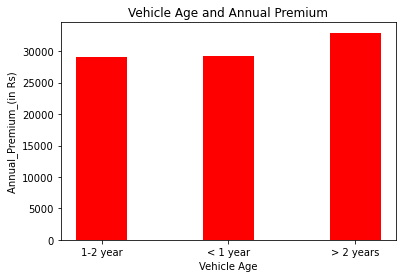

The premium increases greater than 2 years of purchase of vehicle


In [19]:
##### iv. Vehicle age wise average annual premium.
#vehicle age wise average annual premium 
aap_v_age_df=master_df.groupby(["Vehicle_Age"])["Annual_Premium_(in Rs)"].mean()
aap_v_age_df
data=aap_v_age_df.to_dict()
Vehicle_age=list(data.keys())
annprem=list(data.values())
plt.bar(Vehicle_age,annprem, color ='red', width = 0.4)
plt.xlabel("Vehicle Age")
plt.ylabel("Annual_Premium_(in Rs)")
plt.title("Vehicle Age and Annual Premium")
plt.show()
print('The premium increases greater than 2 years of purchase of vehicle')

#### 5. Is there any relation between Person Age and annual premium?
Hint: use correlation function (Correlation describes the relationship between two variables).

Correlation coefficient < -0.5 - Strong negative relationship

Correlation coefficient > 0.5 - Strong positive relationship

0.5 < Correlation coefficient < 0.5 - There is no relationship.

In [ ]:
import matplotlib.pyplot as plt
Corr_coeff=master_df["Age"].corr(master_df["Annual_Premium_(in Rs)"])
if Corr_coeff< -0.5:
    print("Correlation coefficient is ",Corr_coeff, "Strong negative relationship")
elif Corr_coeff> 0.5:
    print("Correlation coefficient is ",Corr_coeff, "Strong positive relationship")
else:
     print("Correlation coefficient is ",Corr_coeff, ", There is no relationship") 
data=master_df.groupby(['Age'])["Annual_Premium_(in Rs)"].mean().to_dict()
Age=list(data.keys())
annprem=list(data.values())
plt.bar(Age,annprem, color ='red', width = 0.4)
plt.xlabel("Age")
plt.ylabel("Annual_Premium_(in Rs)")
plt.title("Age and Annual Premium")
plt.show()


In [21]:
Q1=DF1.describe().loc['25%','Age']
Q3=DF1.describe().loc['75%','Age']
IQR=Q3-Q1
print('Q1: ',Q1,'  ',DF1.describe().loc['50%','Age'])
print('Q3: ',Q3)
print('OUTLIERS PRESENT IN AGE <(Q1-IQR*1.5)', DF1.loc[DF1['Age']<(Q1-IQR*1.5),'Age'].count())
print('OUTLIERS PRESENT IN AGE >(Q3+IQR*1.5)', DF1.loc[DF1['Age']>(Q3+IQR*1.5),'Age'].count())


Q1:  25.0    36.0
Q3:  49.0
OUTLIERS PRESENT IN AGE <(Q1-IQR*1.5) 0
OUTLIERS PRESENT IN AGE >(Q3+IQR*1.5) 0
